In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### importing the training set

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [3]:
training_set=dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

#### feature scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set_scaled=sc.fit_transform(training_set)

In [5]:
training_set.shape

(1258, 1)

#### creating a data structure with 60 timesteps and output

In [6]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

#### Reshaping

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
regressor=Sequential()

#### adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#### adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#### adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#### adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#### adding the output layer

In [13]:
regressor.add(Dense(units=1))

#### compiling the RNN

In [14]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

#### fitting the RNN to the Training set

In [15]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 18s 144ms/step - loss: 0.0464
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0036
Epoch 13/100
3

In [16]:
pred=regressor.predict(x_train)

38/38 [==============================] - 7s 40ms/step


#### Evaluating the RNN

In [17]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_train,pred))
rmse

0.02411401526163134

#### making the prediction and visualising the results

##### getting the real stock price of 2017

In [18]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:, 1:2].values

#### getting the predicted stock price of 2017

In [20]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 132ms/step


#### visualising the results

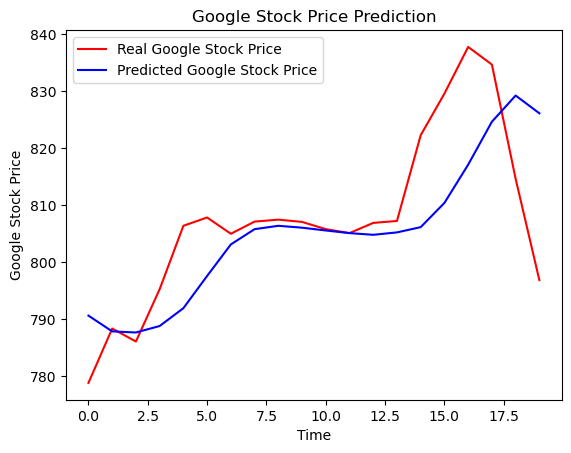

In [21]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()